In [1]:
pip install --no-cache-dir tensorflow


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\Sindhu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf

In [ ]:
pip install matplotlib

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\Sindhu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.python import pywrap_tensorflow

In [ ]:
import os
print("Current Working Directory:", os.getcwd())
current_directory=os.getcwd()
train_path=os.path.join(current_directory,"datasets","Train")
valid_path=os.path.join(current_directory,"datasets","Valid")
test_path=os.path.join(current_directory,"datasets","Test")

Current Working Directory: c:\Users\Sindhu\Desktop\SAP\Potato_disease


In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    #batch_size=32,
    image_size=(128,128),
    shuffle=True,
    #seed=None,
    #validation_split=None,
    #subset=None,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [ ]:
#Get the class labels
labels=training_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    #batch_size=32,
    image_size=(128,128),
    shuffle=True,
    #seed=None,
    #validation_split=None,
    #subset=None,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [ ]:
labels=validation_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

C:\Users\Sindhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary

<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [ ]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 186s 5s/step - accuracy: 0.3724 - loss: 1.8293 - val_accuracy: 0.6667 - val_loss: 0.6786
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.6801 - loss: 0.6783 - val_accuracy: 0.7744 - val_loss: 0.4674
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.7634 - loss: 0.4992 - val_accuracy: 0.8178 - val_loss: 0.4035
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.8383 - loss: 0.3621 - val_accuracy: 0.8111 - val_loss: 0.4549
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 179s 6s/step - accuracy: 0.8392 - loss: 0.3852 - val_accuracy: 0.8422 - val_loss: 0.3708
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.8603 - loss: 0.3295 - val_accuracy: 0.8789 - val_loss: 0.2892
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.9163 - loss: 0.2313 - val_accuracy: 0.9711 - val_loss: 0.0770
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 180s 6s/step - accuracy: 0.9665 - loss: 0.1052 - val_accuracy: 0.8844 - v

In [ ]:
train_loss,train_acc=cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9100 - loss: 0.1997
Training accuracy: 0.9155555367469788


In [ ]:
val_loss,val_acc=cnn.evaluate(validation_set)
print('Validation accuracy:',val_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9222 - loss: 0.1596
Validation accuracy: 0.9155555367469788


In [ ]:
cnn.save('trained_plant_disease_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.46666666865348816,
  0.6911110877990723,
  0.7711111307144165,
  0.8655555844306946,
  0.8744444251060486,
  0.8877778053283691,
  0.9344444274902344,
  0.95333331823349,
  0.7766666412353516,
  0.9155555367469788],
 'loss': [1.2760202884674072,
  0.6520286202430725,
  0.48002558946609497,
  0.33345308899879456,
  0.3130652606487274,
  0.2862078845500946,
  0.18191058933734894,
  0.13227719068527222,
  0.6017025709152222,
  0.20707765221595764],
 'val_accuracy': [0.6666666865348816,
  0.7744444608688354,
  0.8177777528762817,
  0.8111110925674438,
  0.8422222137451172,
  0.8788889050483704,
  0.9711111187934875,
  0.8844444155693054,
  0.8866666555404663,
  0.9155555367469788],
 'val_loss': [0.678648054599762,
  0.4673977196216583,
  0.4034591317176819,
  0.4549073278903961,
  0.37082427740097046,
  0.2892403304576874,
  0.07701834291219711,
  0.3826626241207123,
  0.26898282766342163,
  0.17803984880447388]}

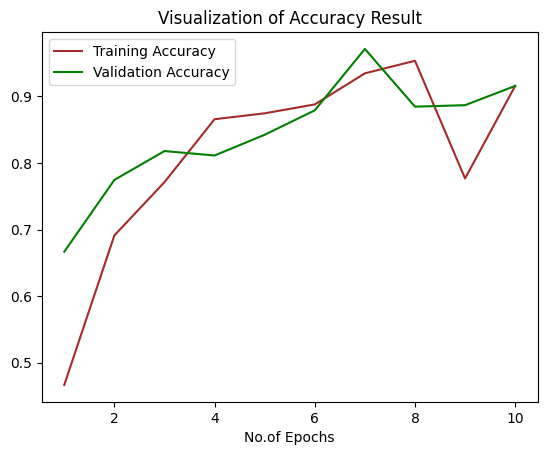

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No.of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()